In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io
import sqlite3
from sqlite3 import Error

In [5]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("DB Connection setup")
    except Error as e:
        print(e)
    finally:
        if conn:
            return conn
        else:
            print("DB Connection failed")


if __name__ == '__main__':
    conn = create_connection("./db/news.db")

DB Connection setup


In [6]:
def getAllSummary():
    cur = conn.cursor()
    cur.execute("SELECT summary FROM news where latest=1")
    rows = cur.fetchall()
    return rows

In [19]:
summaries = getAllSummary()
text = ""
for row in summaries:
    for item in row:
        item = item.encode("utf-8")
        text = text + item + " "

In [21]:
wc = WordCloud(background_color="white")
wc.generate(text)

In [22]:
wc.to_file('cloud_word_summary_1.png')

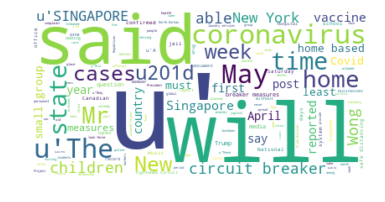

In [23]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

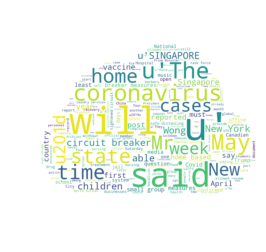

In [26]:
custom_mask = np.array(Image.open("Picture 1.png"))
wc = WordCloud(background_color="white", mask=custom_mask, contour_width=3, contour_color='white')

wc.generate(text)
wc.to_file('cloud_word_summary_2.png')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()